<a href="https://colab.research.google.com/github/Chirag314/Naivebayes-spam-classification/blob/main/Naive_bayes_spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This notebook is copied from exercises from book Ensemble Machine Learning Cookbook.

In [2]:
#import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [4]:
# Read data from github. Use raw format and copy url# Note normal url and raw url will be different.
import pandas as pd
pd.options.display.max_rows=None
pd.options.display.max_columns=None
url = 'https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter04/Naive%20Bayes/spam.csv'
df_messages = pd.read_csv(url,encoding='latin-1',sep=',',names=['labels','message'])
#df = pd.read_csv(url)
print(df_messages.head(5))

  labels                                            message
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
df_messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
# Check the messages by message types
df_messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [8]:
#To analyze our dataset even further, let's take a look at the word count and the character count for each message:
df_messages['word_count']=df_messages['message'].apply(lambda x: len(str(x).split(" ")))
df_messages['charecter_count']=df_messages['message'].str.len()

df_messages[['message','word_count','charecter_count']].head(3)

,message,word_count,charecter_count
0,"Go until jurong point, crazy.. Available only ...",20,111
1,Ok lar... Joking wif u oni...,6,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,28,155


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


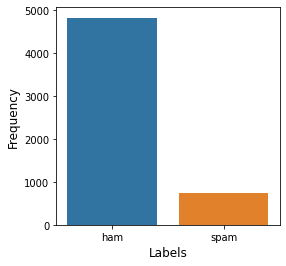

In [9]:
# In this case, labels is our target variable. We have two classes: spam and ham. We can see the distribution of spam and ham messages using a bar plot
labels_count=pd.DataFrame(df_messages.groupby('labels')['message'].count())
labels_count.reset_index(inplace=True)
plt.figure(figsize=(4,4))
sns.barplot(labels_count['labels'],labels_count['message'])
plt.ylabel('Frequency',fontsize=12)
plt.xlabel('Labels',fontsize=12)
plt.show()

#####we will label spam as 1, and ham as 0:.

In [11]:
# create a variable that holds a key-value pair for ham and spam
class_labels={'ham':0, 'spam':1}

# use the class_labels variable with map()
df_messages['labels']=df_messages['labels'].map(class_labels)
df_messages.head()

,labels,message,word_count,charecter_count
0,0,"Go until jurong point, crazy.. Available only ...",20,111
1,0,Ok lar... Joking wif u oni...,6,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,0,U dun say so early hor... U c already then say...,11,49
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61


In [12]:
# Create train and test set
X_train, X_test, Y_train, Y_test= train_test_split(df_messages['message'], df_messages['labels'], test_size=0.2,random_state=42)

In [13]:
#We need to convert the collection of messages to a matrix of token counts. This can be done using CountVectorizer():
vectorizer=CountVectorizer(lowercase=True,stop_words='english',analyzer='word')
# Learn a vocabulary from one or more message using the fit_transform() function

vect_train=vectorizer.fit_transform(X_train)


In [14]:
# We proceed to build our model with the Naive Bayes algorithm:
model_nb=MultinomialNB()

#We fit our model to the data
model_nb.fit(vect_train,Y_train)

#Prediction
predict_train=model_nb.predict(vect_train)



In [15]:
#Load required libraries for the evaluation metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [16]:
# We now check our accuracy by evaluating the model with the training data:
print('Accuracy score: {}'.format(accuracy_score(Y_train,predict_train)))

#Calculate other metrics on your training data
print('Precision score :{}'.format(precision_score(Y_train,predict_train)))
print('Recall score :{}'.format(recall_score(Y_train,predict_train)))
print('F1 score :{}'.format(f1_score(Y_train,predict_train)))

Accuracy score: 0.9946152120260264
Precision score :0.9782971619365609
Recall score :0.981574539363484
F1 score :0.979933110367893


In [17]:
#Now we check the accuracy of our test data by evaluating the model with the unseen test data:
vect_test=vectorizer.transform(X_test)
prediction=model_nb.predict(vect_test)

# Calculate test accuracy
print("Accuracy score :{}".format(accuracy_score(Y_test,prediction)))
print("Precision score :{}".format(precision_score(Y_test,prediction)))
print("Recall score :{}".format(recall_score(Y_test,prediction)))
print("F1 score :{}".format(f1_score(Y_test, prediction)))

Accuracy score :0.9838565022421525
Precision score :0.9583333333333334
Recall score :0.92
F1 score :0.9387755102040817
